In [10]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pause
import cv2

In [11]:
os.system('adb shell screencap -p /sdcard/screencap.png')
os.system('adb pull /sdcard/screencap.png')

0

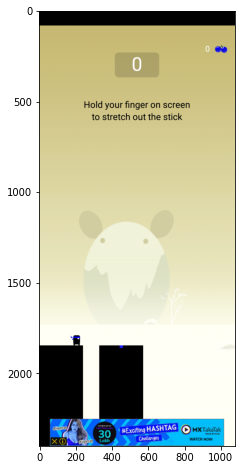

In [12]:

img = cv2.imread('screencap.png')
screen_height, screen_width, _ = img.shape

plt.rcParams["figure.figsize"] = [15,8]
plt.imshow(img)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [13]:
yf, xf, zf = np.shape(img)
yf = yf/2480
xf = xf/1080

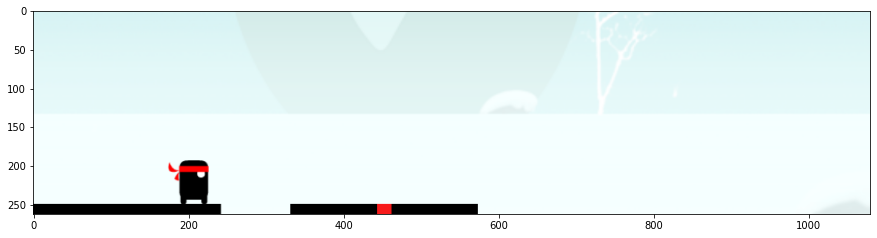

In [14]:
img_crop = img[int(np.floor(1650*yf)):int(np.floor(1920*yf)), :]
plt.imshow(img_crop)
y_crop, x_crop, z_crop = np.shape(img_crop)

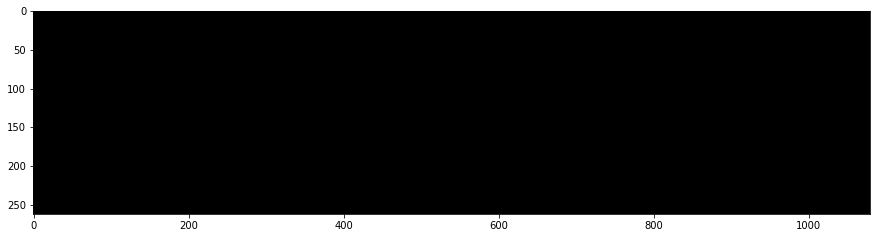

In [15]:
my_img = np.zeros_like(img_crop)


"""    visualise black canvas   """

plt.imshow(my_img)

In [16]:
rcord=set()


for j in range(y_crop):
    for k in range(x_crop):
        if(((img_crop[j,k,0]==255) and (img_crop[j,k,1]==0) and (img_crop[j,k,2]==0)) or ((img_crop[j,k,0]==247) and (img_crop[j,k,1]==27) and (img_crop[j,k,2]==27))):
            my_img[j,k,0] = 0
            my_img[j,k,1] = 255
            my_img[j,k,2] = 0
            rcord.add(k)  # record the x-coordinates of your red-color cells in a set

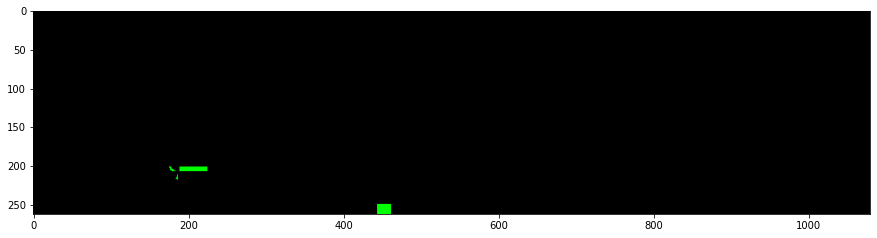

In [17]:
plt.imshow(my_img)

In [18]:
rcord = sorted(rcord)
print(rcord)

[176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461]


In [19]:
def srcTarget(rcord):
    prev=rcord[0]
    for i in rcord:
        # print(prev,i)
        if abs(i-prev) > 10:
            return i, prev + 5    # +5 is just to vaguely compenate for extra distance where stick rises
        prev=i

In [20]:
target, src = srcTarget(rcord)
print(src,target)

229 444


In [21]:
dist = abs(src-target)
rate = 1.048* (screen_width/1080)
time = str(int(dist/rate))

print(dist,time)

215 205


In [22]:
x = str(int(np.ceil(530*yf)))
y = str(int(np.ceil(830*xf)))

os.system('adb shell input touchscreen swipe ' + x + ' ' + x + ' ' + y + ' ' + y + ' ' + time)
pause.seconds(3)

[177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699]
231 682
451 430
[177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476]
231 459
228 217
[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 

[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611]
134 594
460 438
[161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653]
216 636
420 400
[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972]
205 

IndexError: list index out of range

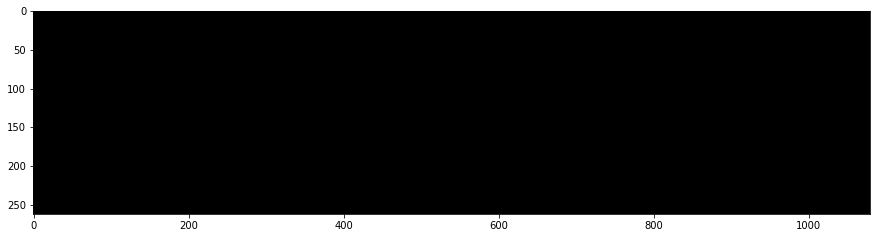

In [23]:
rate = 1.0395
count=0
while count<3:

    os.system('adb shell screencap -p /sdcard/screencap.png')
    os.system('adb pull /sdcard/screencap.png')

    # read the image using openCV
    img = cv2.imread('screencap.png')
    screen_height, screen_width, _ = img.shape

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    yf, xf, zf = np.shape(img)
    yf = yf/2480
    xf = xf/1080
    
    img_crop = img[int(np.floor(1650*yf)):int(np.floor(1920*yf)), :]
    y_crop, x_crop, z_crop = np.shape(img_crop)
    
    my_img = np.zeros_like(img_crop)


    """    visualise black canvas   """

    plt.imshow(my_img)

    rcord=set()


    for j in range(y_crop):
        for k in range(x_crop):
            if(((img_crop[j,k,0]==255) and (img_crop[j,k,1]==0) and (img_crop[j,k,2]==0)) or ((img_crop[j,k,0]==247) and (img_crop[j,k,1]==27) and (img_crop[j,k,2]==27))):
                my_img[j,k,0] = 0
                my_img[j,k,1] = 255
                my_img[j,k,2] = 0
                rcord.add(k)  
    rcord = sorted(rcord)
    print(rcord)
    def srcTarget(rcord):
        prev=rcord[0]
        for i in rcord:
            # print(prev,i)
            if abs(i-prev) > 10:
                return i, prev + 7    
            prev=i
       
    target, src = srcTarget(rcord)
    print(src,target)
    
    dist = abs(src-target)
    rate = 1.048* (screen_width/1080)
    time = str(int(dist/rate))

    print(dist,time)
    
    x = str(int(np.ceil(530*yf)))
    y = str(int(np.ceil(830*xf)))

    os.system('adb shell input touchscreen swipe ' + x + ' ' + x + ' ' + y + ' ' + y + ' ' + time)
    pause.seconds(3)
    